# Warning: *in development*

In [1]:
%load_ext autoreload
%autoreload 2

from viresclient import SwarmRequest
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [180]:
request = SwarmRequest("https://staging.vires.services/ows")
request.available_collections()

General References:
 Swarm Data Handbook, https://earth.esa.int/web/guest/missions/esa-eo-missions/swarm/data-handbook 
 The Swarm Satellite Constellation Application and Research Facility (SCARF) and Swarm data products, https://doi.org/10.5047/eps.2013.07.001 
 Swarm Science Data Processing and Products (2013), https://link.springer.com/journal/40623/65/11/page/1 
 Special issue “Swarm science results after 2 years in space (2016), https://www.springeropen.com/collections/swsr 
 Earth's Magnetic Field: Understanding Geomagnetic Sources from the Earth's Interior and its Environment (2017), https://link.springer.com/journal/11214/206/1/page/1 

MAG
   SW_OPER_MAGA_LR_1B
   SW_OPER_MAGB_LR_1B
   SW_OPER_MAGC_LR_1B
 https://earth.esa.int/web/guest/missions/esa-eo-missions/swarm/data-handbook/level-1b-product-definitions#MAGX_LR_1B_Product 

EFI
   SW_OPER_EFIA_LP_1B
   SW_OPER_EFIB_LP_1B
   SW_OPER_EFIC_LP_1B
 https://earth.esa.int/web/guest/missions/esa-eo-missions/swarm/data-handbook/l

In [181]:
request.available_measurements("AEJ_LPS")

['Latitude_QD',
 'Longitude_QD',
 'MLT_QD',
 'J_CF',
 'J_DF',
 'J_CF_SemiQD',
 'J_DF_SemiQD',
 'J_C']

In [182]:
request.available_measurements("AEJ_LPL")

['Latitude_QD', 'Longitude_QD', 'MLT_QD', 'J', 'J_JQ']

In [183]:
request.available_measurements("AEJ_PBL")

['Latitude_QD', 'Longitude_QD', 'MLT_QD', 'J_QD', 'Flags', 'PointType']

In [184]:
request.available_measurements("AOB_FAC")

['Latitude_QD',
 'Longitude_QD',
 'MLT_QD',
 'Boundary_Flag',
 'Quality',
 'Pair_Indicator']

In [185]:
flatten = lambda l: [item for sublist in l for item in sublist]
all_measurements = list(set(flatten([request.available_measurements(n) for n in ("AEJ_LPS", "AEJ_LPL", "AEJ_PBL", "AOB_FAC")])))
all_measurements

['Boundary_Flag',
 'J_CF',
 'PointType',
 'J_JQ',
 'J_C',
 'Flags',
 'Quality',
 'Pair_Indicator',
 'Longitude_QD',
 'J_DF_SemiQD',
 'J_CF_SemiQD',
 'J_QD',
 'J',
 'J_DF',
 'Latitude_QD',
 'MLT_QD']

In [186]:
[f"SW_OPER_{n[:3]}A{n[4:]}_2F" for n in ("AEJ_LPS", "AEJ_LPL", "AEJ_PBL", "AOB_FAC")]

['SW_OPER_AEJALPS_2F',
 'SW_OPER_AEJALPL_2F',
 'SW_OPER_AEJAPBL_2F',
 'SW_OPER_AOBAFAC_2F']

# Fetch them all together

# Must consider the sampling rates - use the highest cadence collection first

# How to better deal with the boundary products....

In [2]:
request = SwarmRequest("https://staging.viresdisc.vires.services/ows")
request.set_collection(
    'SW_OPER_AEJALPS_2F',
    'SW_OPER_AEJALPL_2F',
    'SW_OPER_AEJAPBL_2F',
    'SW_OPER_AOBAFAC_2F'
)
request.set_products(
    measurements=
        request.available_measurements("AEJ_LPS") + 
        request.available_measurements("AEJ_LPL") + 
        request.available_measurements("AEJ_PBL") + 
        request.available_measurements("AOB_FAC"),
    auxiliaries=["MLT", "QDLat", "QDLon"]
)

In [3]:
start, end = dt.datetime(2015, 6, 1), dt.datetime(2015, 6, 2)
data = request.get_between(start, end)

[1/1] Processing:  100%|██████████|  [ Elapsed: 00:01, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:02, Remaining: 00:00 ] (7.721MB)


In [81]:
data.as_xarray()

NotImplementedError: J: array too complicated

In [4]:
df = data.as_dataframe()
df.head()

,Spacecraft,Latitude,Longitude,Radius,Latitude_QD,Longitude_QD,MLT_QD,J_CF,J_DF,J_CF_SemiQD,...,J,J_QD,Flags,PointType,Boundary_Flag,Quality,Pair_Indicator,MLT,QDLat,QDLon
2015-06-01 00:34:39,A,53.998806,187.899445,NaN,50.022812,251.550835,12.743473,"[-12.856215343384756, -2.6543241534400526]","[-1.5941049925627189, 7.721045313094205]",13.127365,...,"[6.2525048742030105, -29.57840963902506]",-30.23204,0.0,0.0,0.0,"[nan, nan]",0.0,NaN,NaN,NaN
2015-06-01 00:34:40,A,54.059597,187.903000,NaN,50.085922,251.537888,12.742876,"[-12.806771149621431, -2.6480387117912727]","[-1.540255265261922, 7.449172327569708]",13.077672,...,"[6.2525048742030105, -29.57840963902506]",-30.23204,0.0,0.0,0.0,"[nan, nan]",0.0,NaN,NaN,NaN
2015-06-01 00:34:41,A,54.120384,187.906555,NaN,50.149052,251.524902,12.742277,"[-12.757305335481236, -2.641732933598141]","[-1.486184650270764, 7.176997768122486]",13.027954,...,"[6.2525048742030105, -29.57840963902506]",-30.23204,0.0,0.0,0.0,"[nan, nan]",0.0,NaN,NaN,NaN
2015-06-01 00:34:42,A,54.181171,187.910156,NaN,50.212204,251.511902,12.741676,"[-12.707810153730144, -2.6354056024468435]","[-1.4318832581070564, 6.904478228867266]",12.978205,...,"[6.2525048742030105, -29.57840963902506]",-30.23204,0.0,0.0,0.0,"[nan, nan]",0.0,NaN,NaN,NaN
2015-06-01 00:34:43,A,54.241966,187.913788,NaN,50.275387,251.498878,12.741075,"[-12.65828072868042, -2.6290559852176587]","[-1.3773443334366524, 6.631586139941]",12.928419,...,"[6.2525048742030105, -29.57840963902506]",-30.23204,0.0,0.0,0.0,"[nan, nan]",0.0,NaN,NaN,NaN


# Client issues
- add behaviour for dataframe expansion
- add behaviour for dataset creation

# Fetch each collection individually

In [5]:
request = SwarmRequest("https://staging.viresdisc.vires.services/ows")
request.set_collection(
    'SW_OPER_AEJALPS_2F'
)
request.set_products(
    measurements=request.available_measurements("AEJ_LPS"),
    auxiliaries=["MLT", "QDLat", "QDLon", "OrbitNumber", "QDOrbitDirection"]
)
start, end = dt.datetime(2015, 6, 1), dt.datetime(2015, 7, 1)
data = request.get_between(start, end)
df_lps = data.as_dataframe(expand=True)
df_lps.head()

[1/1] Processing:  100%|██████████|  [ Elapsed: 00:10, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:30, Remaining: 00:00 ] (124.31MB)


,Spacecraft,Latitude,Longitude,Latitude_QD,Longitude_QD,MLT_QD,J_CF,J_DF,J_CF_SemiQD,J_DF_SemiQD,J_C,OrbitNumber,QDOrbitDirection
2015-06-01 00:34:39,A,53.998806,187.899445,50.022812,251.550835,12.743473,"[-12.856215343384756, -2.6543241534400526]","[-1.5941049925627189, 7.721045313094205]",13.127365,7.883889,-0.010069,8513,1
2015-06-01 00:34:40,A,54.059597,187.903000,50.085922,251.537888,12.742876,"[-12.806771149621431, -2.6480387117912727]","[-1.540255265261922, 7.449172327569708]",13.077672,7.606744,-0.010069,8513,1
2015-06-01 00:34:41,A,54.120384,187.906555,50.149052,251.524902,12.742277,"[-12.757305335481236, -2.641732933598141]","[-1.486184650270764, 7.176997768122486]",13.027954,7.329259,-0.010069,8513,1
2015-06-01 00:34:42,A,54.181171,187.910156,50.212204,251.511902,12.741676,"[-12.707810153730144, -2.6354056024468435]","[-1.4318832581070564, 6.904478228867266]",12.978205,7.051391,-0.010069,8513,1
2015-06-01 00:34:43,A,54.241966,187.913788,50.275387,251.498878,12.741075,"[-12.65828072868042, -2.6290559852176587]","[-1.3773443334366524, 6.631586139941]",12.928419,6.773109,-0.010069,8513,1


In [6]:
del df_lps

In [7]:
request = SwarmRequest("https://staging.viresdisc.vires.services/ows")
request.set_collection(
    'SW_OPER_AEJALPL_2F'
)
request.set_products(
    measurements=request.available_measurements("AEJ_LPL"),
    auxiliaries=["MLT", "QDLat", "QDLon", "OrbitNumber", "QDOrbitDirection"]
)
start, end = dt.datetime(2015, 6, 1), dt.datetime(2015, 7, 1)
data = request.get_between(start, end)
df_lpl = data.as_dataframe(expand=True)
df_lpl.head()

[1/1] Processing:  100%|██████████|  [ Elapsed: 00:09, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:02, Remaining: 00:00 ] (7.527MB)


,Spacecraft,Latitude,Longitude,Latitude_QD,Longitude_QD,MLT_QD,J_N,J_E,OrbitNumber,QDOrbitDirection
2015-06-01 00:28:52.333179712,A,30.298155,-172.866296,27.062379,-104.729180,12.899048,-1.317089,7.249304,8513,1
2015-06-01 00:29:07.967164040,A,31.299718,-172.868858,27.998945,-104.885711,12.892781,-2.558336,13.994844,8513,1
2015-06-01 00:29:23.600640535,A,32.301250,-172.870067,28.937697,-105.042112,12.886523,-3.642526,19.806001,8513,1
2015-06-01 00:29:39.233609438,A,33.302749,-172.869840,29.878952,-105.198483,12.880266,-4.500500,24.326854,8513,1
2015-06-01 00:29:54.866093636,A,34.304213,-172.868087,30.823030,-105.354936,12.874004,-5.077308,27.285329,8513,1


In [8]:
request = SwarmRequest("https://staging.viresdisc.vires.services/ows")
request.set_collection(
    'SW_OPER_AEJAPBL_2F',
)
request.set_products(
    measurements=request.available_measurements("AEJ_PBL"),
    auxiliaries=["MLT", "QDLat", "QDLon", "OrbitNumber", "QDOrbitDirection"]
)
data = request.get_between(start, end)
df_pbl = data.as_dataframe()
df_pbl.head()

[1/1] Processing:  100%|██████████|  [ Elapsed: 00:09, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.704MB)


,Spacecraft,Latitude,Longitude,Latitude_QD,Longitude_QD,MLT_QD,J_QD,Flags,PointType,OrbitNumber,QDOrbitDirection
2015-06-01 00:35:07.427671909,A,54.320942,-172.289939,50.620846,-108.827885,12.725777,NaN,8,0,8513,1
2015-06-01 00:38:14.905820370,A,66.302593,-170.717946,63.374580,-112.314921,12.543246,-56.779371,8,4,8513,1
2015-06-01 00:40:19.877617121,A,74.248020,-167.851134,72.008716,-116.933295,12.268632,NaN,8,1,8513,1
2015-06-01 00:40:19.877617121,A,74.248020,-167.851134,72.008716,-116.933295,12.268632,NaN,8,2,8513,1
2015-06-01 00:41:22.361289024,A,78.182286,-164.778466,76.268326,-121.186686,12.001707,151.719663,8,5,8513,1


In [9]:
request = SwarmRequest("https://staging.viresdisc.vires.services/ows")
request.set_collection(
    'SW_OPER_AOBAFAC_2F'
)
request.set_products(
    measurements=request.available_measurements("AOB_FAC"),    
    auxiliaries=["MLT", "QDLat", "QDLon", "OrbitNumber", "QDOrbitDirection"]
)
data = request.get_between(start, end)
df_aob = data.as_dataframe(expand=True)
df_aob.head()

[1/1] Processing:  100%|██████████|  [ Elapsed: 00:09, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.45MB)


,Spacecraft,Latitude,Longitude,Radius,Latitude_QD,Longitude_QD,MLT_QD,Boundary_Flag,Quality_0,Quality_1,Pair_Indicator,MLT,QDLat,QDLon,OrbitNumber,QDOrbitDirection
2015-06-01 00:39:56.500,A,72.767024,-168.615794,6820612.975,70.398788,-115.789558,12.338523,1,0.510797,0.258899,-1,12.341084,70.398804,-115.789490,8513,1
2015-06-01 00:42:03.500,A,80.736781,-161.246483,6820214.820,79.007805,-125.640503,11.715604,2,1.520456,0.180134,1,11.718183,79.007820,-125.640411,8513,1
2015-06-01 00:47:56.500,A,75.966728,-9.866493,6820791.875,75.426155,87.666527,2.030002,2,0.812700,0.166617,1,2.032616,75.426147,87.666481,8513,-1
2015-06-01 00:51:38.500,A,61.847645,-5.088275,6822352.225,60.113380,78.076439,1.449700,1,1.805861,0.391444,-1,1.452341,60.113377,78.076424,8513,-1
2015-06-01 01:25:33.500,A,-68.183791,-2.004343,6839519.570,-60.162949,47.532505,23.953562,1,2.862414,0.329140,-1,23.956390,-60.162949,47.532536,8513,-1


#  issues:
- QDLat, QDLon, MLT, (...?) not returned for AEJ_PBL, AEJ_LPL,AEJ_LPS,
- because there is no Radius

# Visualising data

# AEJ_LPL - J line profile from line current (LC) method - whole month

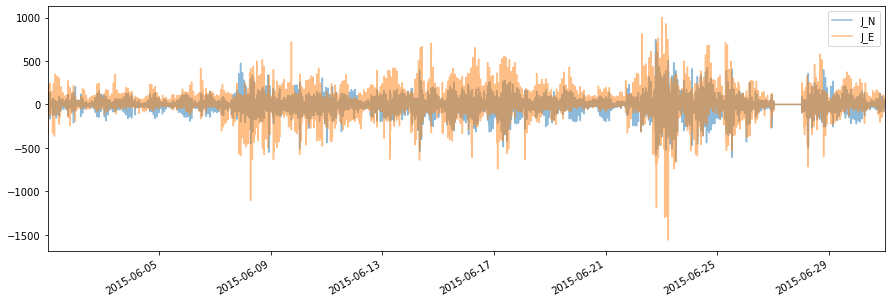

In [10]:
df_lpl.plot(y=["J_N", "J_E"], figsize=(15,5), alpha=0.5);

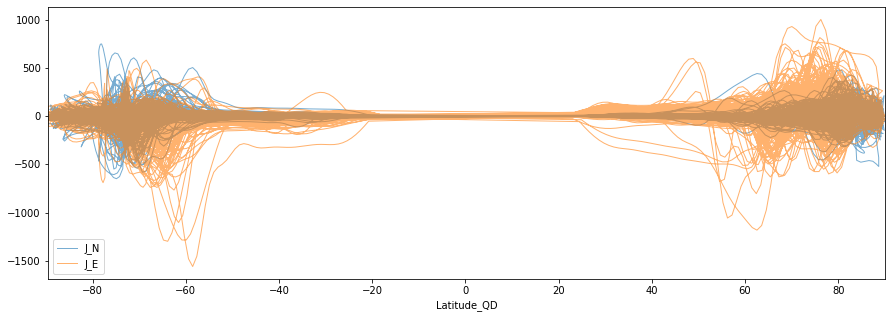

In [11]:
df_lpl.plot(x="Latitude_QD", y=["J_N", "J_E"], figsize=(15,5), linewidth=1, alpha=0.6);

# AEJ_LPL - J line profile from line current (LC) method - one day

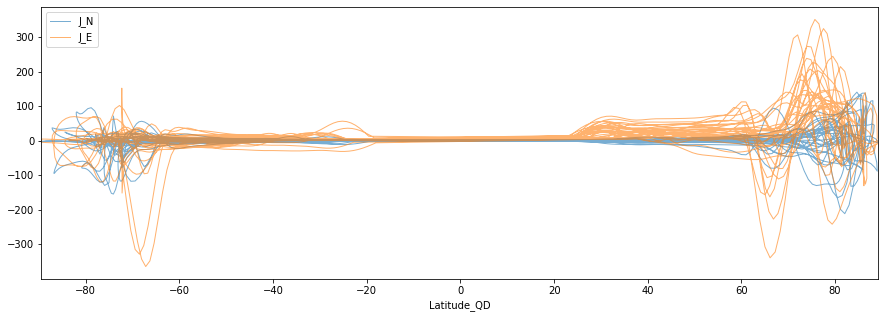

In [12]:
df_lpl["2015-06-01"].plot(x="Latitude_QD", y=["J_N", "J_E"], figsize=(15,5), linewidth=1, alpha=0.6);

## extract just a few orbits, ascending parts only

#### issue?: I think the QDOrbitDirection doesn't quite line up with the Latitude_QD (which is slightly different from QDLat)

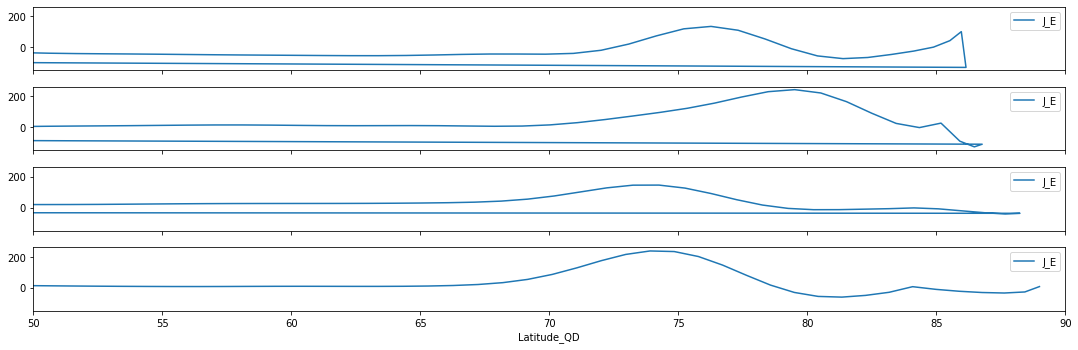

In [13]:
time_select = "2015-06-01"
time_select = slice("2015-06-01-00", "2015-06-01-05",)
df_subset = df_lpl[time_select].where(df_lpl["QDOrbitDirection"]==1).dropna()
n_orbits = df_subset["OrbitNumber"].unique().shape[0]
fig, axes = plt.subplots(nrows=n_orbits, ncols=1, figsize=(15,5), sharex=True, sharey=True)
for i, (_, df_subsubset) in enumerate(df_subset.groupby("OrbitNumber")):
    df_subsubset.plot(ax=axes[i], x="Latitude_QD", y="J_E")
fig.tight_layout()
axes[0].set_xlim(50, 90);

# with AEJ_PBL - peaks and boundaries from LC method

  PointTypes:
  -  0 - EB-WEJ  - equatorward boundary
  -  1 - EB-EEJ
  -  2 - PB-WEJ  - poleword boundary
  -  3 - PB-EEJ
  -  4 - Peak min. J_QD (WEJ)
  -  5 - Peak min. J_QD (EEJ)
  -  255 - no-data

#### issue: the nearest-neighbour interpolation means the PBL data comes out wrong if you request LPL first

In [24]:
request = SwarmRequest("https://staging.viresdisc.vires.services/ows")
request.set_collection(
    'SW_OPER_AEJALPL_2F', 'SW_OPER_AEJAPBL_2F'
)
request.set_products(
    measurements=request.available_measurements("AEJ_LPL") + request.available_measurements("AEJ_PBL"),
    auxiliaries=["MLT", "QDLat", "QDLon", "OrbitNumber", "QDOrbitDirection"]
)
start, end = dt.datetime(2015, 6, 1), dt.datetime(2015, 7, 1)
data = request.get_between(start, end)
df_lplpbl = data.as_dataframe(expand=True)
df_lplpbl.head()

[1/1] Processing:  100%|██████████|  [ Elapsed: 00:09, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:04, Remaining: 00:00 ] (10.103MB)


,Spacecraft,Latitude,Longitude,Latitude_QD,Longitude_QD,MLT_QD,J_N,J_E,J_QD,Flags,PointType,OrbitNumber,QDOrbitDirection
2015-06-01 00:28:52.333179712,A,30.298155,-172.866296,27.062379,-104.729180,12.899048,-1.317089,7.249304,7.367980,0.0,0.0,8513,1
2015-06-01 00:29:07.967164040,A,31.299718,-172.868858,27.998945,-104.885711,12.892781,-2.558336,13.994844,14.226762,0.0,0.0,8513,1
2015-06-01 00:29:23.600640535,A,32.301250,-172.870067,28.937697,-105.042112,12.886523,-3.642526,19.806001,20.138164,0.0,0.0,8513,1
2015-06-01 00:29:39.233609438,A,33.302749,-172.869840,29.878952,-105.198483,12.880266,-4.500500,24.326854,24.739651,0.0,0.0,8513,1
2015-06-01 00:29:54.866093636,A,34.304213,-172.868087,30.823030,-105.354936,12.874004,-5.077308,27.285329,27.753706,0.0,0.0,8513,1


### Make a new PBL df which includes the LPL J, at the PBL cadence

In [68]:
request = SwarmRequest("https://staging.viresdisc.vires.services/ows")
request.set_collection(
    'SW_OPER_AEJAPBL_2F', "SW_OPER_AEJALPL_2F"
)
request.set_products(
    measurements=request.available_measurements("AEJ_PBL") + ["J"],
    auxiliaries=["MLT", "QDLat", "QDLon", "OrbitNumber", "QDOrbitDirection"]
)
data = request.get_between(start, end)
df_pbl = data.as_dataframe(expand=True)
df_pbl.head()

[1/1] Processing:  100%|██████████|  [ Elapsed: 00:09, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.863MB)


,Spacecraft,Latitude,Longitude,Latitude_QD,Longitude_QD,MLT_QD,J_QD,Flags,PointType,J_N,J_E,OrbitNumber,QDOrbitDirection
2015-06-01 00:35:07.427671909,A,54.320942,-172.289939,50.620846,-108.827885,12.725777,NaN,8,0,8.387027,-38.757585,8513,1
2015-06-01 00:38:14.905820370,A,66.302593,-170.717946,63.374580,-112.314921,12.543246,-56.779371,8,4,15.113068,-54.731090,8513,1
2015-06-01 00:40:19.877617121,A,74.248020,-167.851134,72.008716,-116.933295,12.268632,NaN,8,1,7.689136,-19.720218,8513,1
2015-06-01 00:40:19.877617121,A,74.248020,-167.851134,72.008716,-116.933295,12.268632,NaN,8,2,7.689136,-19.720218,8513,1
2015-06-01 00:41:22.361289024,A,78.182286,-164.778466,76.268326,-121.186686,12.001707,151.719663,8,5,-70.111325,134.548240,8513,1


# Produce ascending/descending-split plots of J_E together with the PBL points marked

### use the df_lpl and the new df_pbl

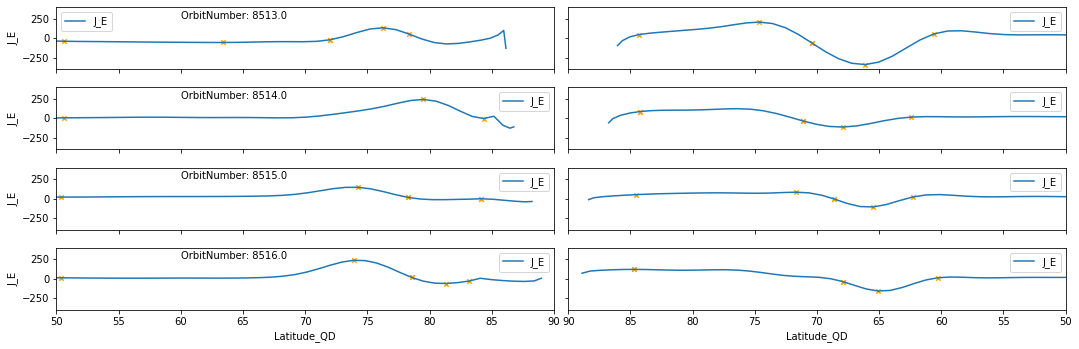

In [77]:
time_select = "2015-06-01"
time_select = slice("2015-06-01-00", "2015-06-01-05",)
df_subset = df_lpl[time_select]
n_orbits = df_subset["OrbitNumber"].unique().shape[0]
fig, axes = plt.subplots(nrows=n_orbits, ncols=2, figsize=(15,5), sharex="col", sharey=True)
for i, (_, df_subsubset) in enumerate(df_subset.groupby("OrbitNumber")):
    df_subsubset = df_subsubset.where((df_subsubset["Latitude_QD"] > 45) & (df_subsubset["Latitude_QD"] < 90)).dropna()
    df_left = df_subsubset.where(df_subsubset["QDOrbitDirection"]==1).dropna()
    df_right = df_subsubset.where(df_subsubset["QDOrbitDirection"]==-1).dropna()
    df_left.plot(ax=axes[i, 0], x="Latitude_QD", y="J_E")
    orbitnumber = df_subsubset.iloc[0]["OrbitNumber"]
    df_pbl.where(
        (df_pbl["OrbitNumber"]==orbitnumber)&(df_pbl["QDOrbitDirection"]==1)
        ).plot(ax=axes[i, 0], x="Latitude_QD", y="J_E", kind="scatter", marker="x", color="orange")
    df_pbl.where(
        (df_pbl["OrbitNumber"]==orbitnumber)&(df_pbl["QDOrbitDirection"]==-1)
        ).plot(ax=axes[i, 1], x="Latitude_QD", y="J_E", kind="scatter", marker="x", color="orange")
    df_right.plot(ax=axes[i, 1], x="Latitude_QD", y="J_E")
    axes[i, 0].text(60, 250, f"OrbitNumber: {orbitnumber}")
fig.tight_layout()
axes[0, 0].set_xlim(50, 90)
axes[0, 1].set_xlim(90, 50)
axes[0, 0].set_ylim(-400, 400);